# Customer Segmentation

Customer segmentation is an analytical technique to group customers based on their purchasing behavior in order to decide a better marketing strategy.

The dataset is from https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.style.use("bmh")

In [2]:
# load data
customer_data = pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
# check missing data
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There aren't missing values in this dataset.

In [6]:
customer_data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Let's see how each characteristic affects the spending score.

(-3.9000000000000004, 103.90000000000002, 0.0, 18.9)

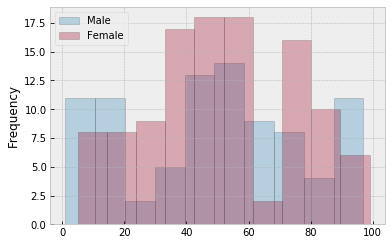

In [7]:
g1 = customer_data.groupby("Genre", sort=False)["Spending Score (1-100)"]
g1.plot(kind="hist", alpha=0.3, ec="k")
plt.legend()
plt.axis()

The highest and the lowest score are dominated by male while the middle score is dominated by female. 
There aren't many mens with a score between 20-30 and there aren't many women with a score between 60-70.

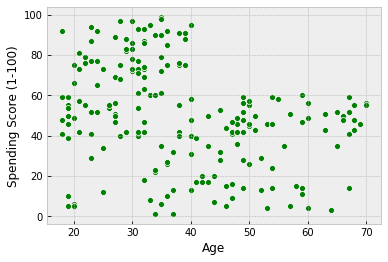

In [8]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=customer_data, color="green")

People with 40 years and above have a spending score between 0-60.
The others tend to have a higher spending score.

Text(0, 0.5, 'Spending Score (1-100)')

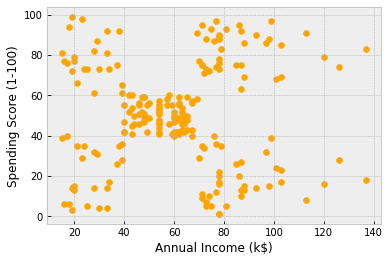

In [9]:
plt.scatter(customer_data["Annual Income (k$)"], customer_data["Spending Score (1-100)"], color="orange")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

It's possible to see 5 different groups of customers:
* customers with low (0-40) annual income that have low(0-40) spending score
* customers with low (0-40) annual income that have high (60-100) spending score
* customers with medium (40-70) annual income that have medium (40-60) spending score
* customers with high (70-140) annual income that have low (0-40) spending score
* customers with high (70-140) annual income that have high (60-100) spending score

I choose k-means to identify similar groups of customers and I will only use Annual Income column in the model because it's the only one where there are groups of customers as it's shown in the last scatter plot.

In [10]:
model_data_X = customer_data.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values
model_data_X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0)  # n_clusters=5 because we have 5 different groups of customers
model_data_y = kmeans.fit_predict(model_data_X)
model_data_y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

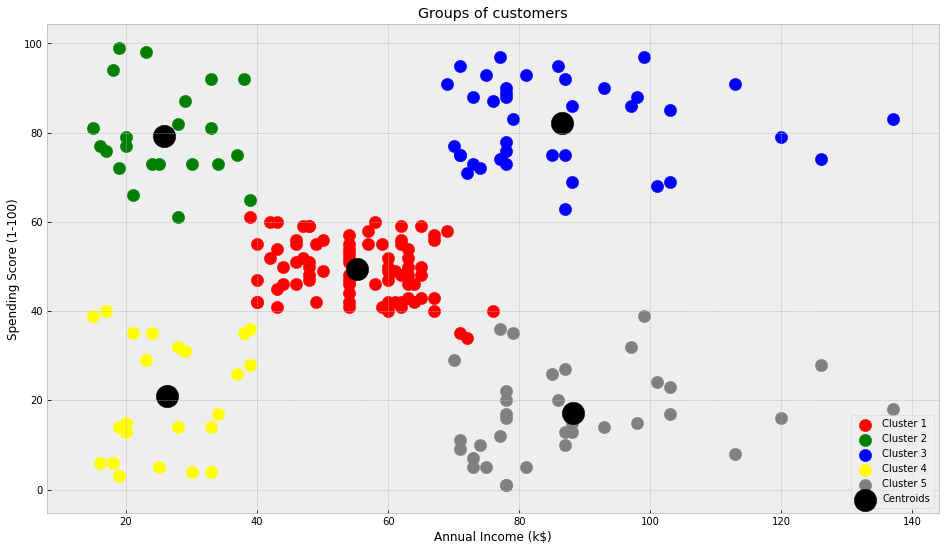

In [12]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(model_data_X[model_data_y == 0, 0], model_data_X[model_data_y == 0, 1], s=150, c='red', label='Cluster 1')
plt.scatter(model_data_X[model_data_y == 1, 0], model_data_X[model_data_y == 1, 1], s=150, c='green', label='Cluster 2')
plt.scatter(model_data_X[model_data_y == 2, 0], model_data_X[model_data_y == 2, 1], s=150, c='blue', label='Cluster 3')
plt.scatter(model_data_X[model_data_y == 3, 0], model_data_X[model_data_y == 3, 1], s=150, c='yellow', label='Cluster 4')
plt.scatter(model_data_X[model_data_y == 4, 0], model_data_X[model_data_y == 4, 1], s=150, c='grey', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='black', label='Centroids')
plt.title('Groups of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

* <span style="color:red">**Cluster 1**</span>: customers with medium (40-70) annual income that have medium (40-60) spending score
* <span style="color:green">**Cluster 2**</span>: customers with low (0-40) annual income that have high (60-100) spending score
* <span style="color:blue">**Cluster 3**</span>: customers with high (70-140) annual income that have high (60-100) spending score
* <span style="color:yellow">**Cluster 4**</span>: customers with low (0-40) annual income that have low(0-40) spending score
* <span style="color:gray">**Cluster 5**</span>: customers with high (70-140) annual income that have low (0-40) spending score

## Bussiness conclusions

* Customers of cluster 3 are the ones that would benefit the business most, as they spend many money, but they have a income to support it. Because of that, the business owner could send more advertise to them.
* The business would also benefit with customers of cluster 1, because this is the more populated cluster and it's the one that would take more time to run out of customers.
* Products that  people below 40 would buy would be benefic for the bussiness as well, because that age is the one that has a higher spending score.

# Reference:
https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation